#BIBLIOTECAS NECESSÁRIAS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from wordcloud import WordCloud
from tensorflow.keras.layers import TextVectorization
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

#ANALISE EXPLORATÓRIA

In [ ]:
#Importando o dataset
data = pd.read_csv("https://raw.githubusercontent.com/americanas-tech/b2w-reviews01/main/B2W-Reviews01.csv", low_memory=False)

In [ ]:
#Primeiras 10 colunas
data.head()

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG


In [ ]:
#Colunas
data.columns

Index(['submission_date', 'reviewer_id', 'product_id', 'product_name',
       'product_brand', 'site_category_lv1', 'site_category_lv2',
       'review_title', 'overall_rating', 'recommend_to_a_friend',
       'review_text', 'reviewer_birth_year', 'reviewer_gender',
       'reviewer_state'],
      dtype='object')

In [ ]:
#Informações das colunas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   submission_date        132373 non-null  object 
 1   reviewer_id            132373 non-null  object 
 2   product_id             132373 non-null  object 
 3   product_name           132289 non-null  object 
 4   product_brand          40982 non-null   object 
 5   site_category_lv1      132367 non-null  object 
 6   site_category_lv2      128360 non-null  object 
 7   review_title           132071 non-null  object 
 8   overall_rating         132373 non-null  int64  
 9   recommend_to_a_friend  132355 non-null  object 
 10  review_text            129098 non-null  object 
 11  reviewer_birth_year    126389 non-null  float64
 12  reviewer_gender        128237 non-null  object 
 13  reviewer_state         128382 non-null  object 
dtypes: float64(1), int64(1), object(12)


In [ ]:
#Estatísticas das variáveis numéricas
data.describe()

,overall_rating,reviewer_birth_year
count,132373.000000,126389.000000
mean,3.492004,1977.495898
std,1.530289,21.895265
min,1.000000,59.000000
25%,2.000000,1969.000000
50%,4.000000,1980.000000
75%,5.000000,1987.000000
max,5.000000,2018.000000


In [ ]:
#Valores nulos por coluna
data.isnull().sum()

submission_date              0
reviewer_id                  0
product_id                   0
product_name                84
product_brand            91391
site_category_lv1            6
site_category_lv2         4013
review_title               302
overall_rating               0
recommend_to_a_friend       18
review_text               3275
reviewer_birth_year       5984
reviewer_gender           4136
reviewer_state            3991
dtype: int64

In [ ]:
#Valores únicos por coluna
data.nunique()

submission_date          129927
reviewer_id              112993
product_id                48001
product_name              47363
product_brand              1062
site_category_lv1            54
site_category_lv2           713
review_title              56555
overall_rating                5
recommend_to_a_friend         2
review_text              126724
reviewer_birth_year         115
reviewer_gender               2
reviewer_state               27
dtype: int64

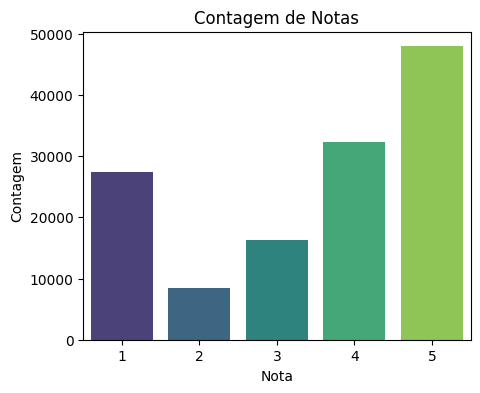

In [ ]:
#Contagem de notas
contagem_notas = data['overall_rating'].value_counts()
plt.figure(figsize=(5, 4))
sns.barplot(x=contagem_notas.index, y=contagem_notas.values, palette='viridis')
plt.title('Contagem de Notas')
plt.xlabel('Nota')
plt.ylabel('Contagem')
plt.show()

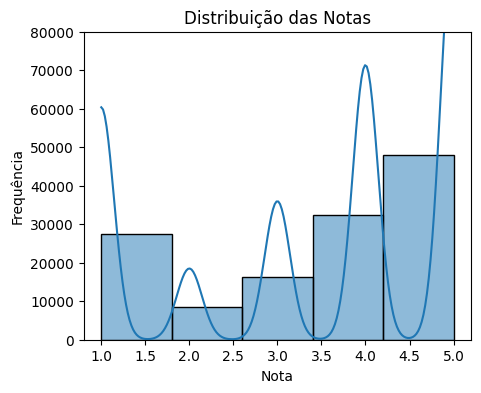

In [ ]:
#Distribuição das notas
plt.figure(figsize=(5, 4))
sns.histplot(data['overall_rating'], bins=5, kde=True)
plt.title('Distribuição das Notas')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.ylim(0, 80000)
plt.show()

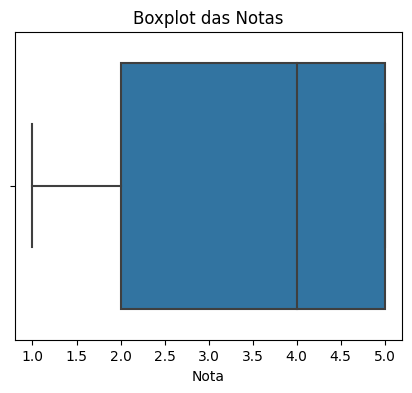

In [ ]:
#Boxplot das notas
plt.figure(figsize=(5, 4))
sns.boxplot(x=data['overall_rating'])
plt.title('Boxplot das Notas')
plt.xlabel('Nota')
plt.show()

<ipython-input-57-53c048a0bee8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


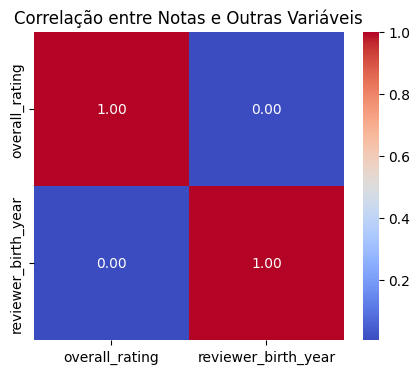

In [ ]:
#Correlação das variáveis
correlation_matrix = data.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Notas e Outras Variáveis')
plt.show()

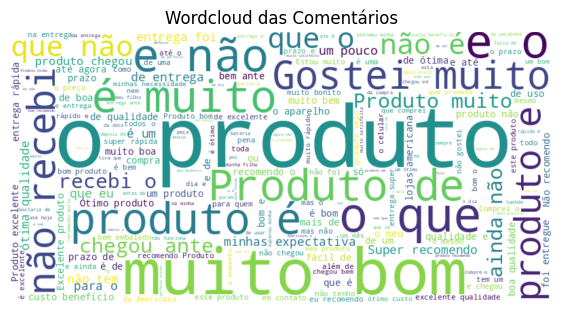

In [ ]:
#Wordcloud avaliações
comment_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['review_text'].astype(str)))
plt.figure(figsize=(7, 5))
plt.imshow(comment_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud das Comentários')
plt.show()

In [ ]:
#Separando avaliações positivas e negativas
positivos = data[data['overall_rating'] > 3]['review_text']
negativos = data[data['overall_rating'] < 3]['review_text']

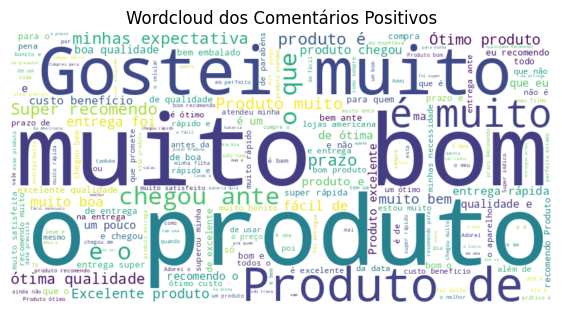

In [ ]:
#Wordcloud avaliações positivas
comment_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positivos.astype(str)))
plt.figure(figsize=(7, 5))
plt.imshow(comment_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud dos Comentários Positivos')
plt.show()

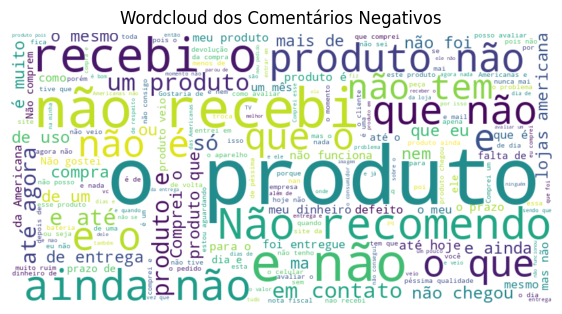

In [ ]:
#Wordcloud avaliações negativas
comment_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negativos.astype(str)))
plt.figure(figsize=(7, 5))
plt.imshow(comment_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud dos Comentários Negativos')
plt.show()

#PREPARAÇÃO DOS DADOS

##TRANSFORMAÇÃO

In [ ]:
#Criando um novo dataset
df = data[["overall_rating", "review_text"]]

In [ ]:
#Criando coluna "sentimento"
df["sentimento"] = df["overall_rating"].apply(lambda x: 'positivo' if x > 3 else 'negativo')

<ipython-input-63-0e46540d1c1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentimento"] = df["overall_rating"].apply(lambda x: 'positivo' if x > 3 else 'negativo')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall_rating  132373 non-null  int64 
 1   review_text     129098 non-null  object
 2   sentimento      132373 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


In [ ]:
#Removendo avaliações sem texto
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129098 entries, 0 to 132372
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall_rating  129098 non-null  int64 
 1   review_text     129098 non-null  object
 2   sentimento      129098 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.9+ MB


In [ ]:
df["sentimento"].value_counts()

positivo    79316
negativo    49782
Name: sentimento, dtype: int64

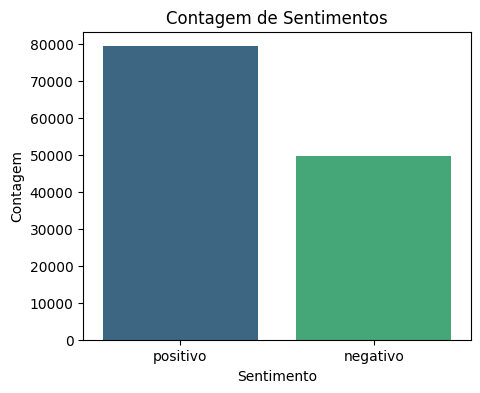

In [ ]:
#Contagem de sentimentos positivos e negativos
contagem_sentimento = df['sentimento'].value_counts()
plt.figure(figsize=(5, 4))
sns.barplot(x=contagem_sentimento.index, y=contagem_sentimento.values, palette='viridis')
plt.title('Contagem de Sentimentos')
plt.xlabel('Sentimento')
plt.ylabel('Contagem')
plt.show()

In [ ]:
#One-Hot-Encoding
df[['negativo', 'positivo']] = pd.get_dummies(df['sentimento'])

In [ ]:
df[['sentimento', 'negativo', 'positivo']][12:16]

,sentimento,negativo,positivo
12,positivo,0,1
13,negativo,1,0
14,positivo,0,1
15,negativo,1,0


In [ ]:
df.head()

,overall_rating,review_text,sentimento,negativo,positivo
0,4,Estou contente com a compra entrega rápida o ú...,positivo,0,1
1,4,"Por apenas R$1994.20,eu consegui comprar esse ...",positivo,0,1
2,4,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,positivo,0,1
3,4,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,positivo,0,1
4,5,"A entrega foi no prazo, as americanas estão de...",positivo,0,1


In [ ]:
#Separando as variáveis
X = df['review_text']
y = df['negativo']

In [ ]:
#Media de palavras por avaliação
round(sum([len(i.split()) for i in X])/len(X))

23

In [ ]:
#Vetorizando os comentários
vectorizer = TextVectorization(max_tokens=None,
                               output_sequence_length=23,
                               output_mode='int')

In [ ]:
vectorizer.adapt(X.values)

In [ ]:
vectorized_text = vectorizer(X.values)

In [ ]:
#Criando um exemplo de vetorização
exemplo = "Eu amei esse produto"
vectorizer([exemplo])

<tf.Tensor: shape=(1, 23), dtype=int64, numpy=
array([[ 32, 150,  65,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])>

In [ ]:
#Valores únicos no dicionário
words_in_vocab = vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] #Palavras mais comuns ([UNK] representa palavras desconhecidas)
print(f"Número de palavras no vocabulário: {len(words_in_vocab)}")
print(f"5 palavras mais comuns: {top_5_words}")

Número de palavras no vocabulário: 67992
5 palavras mais comuns: ['', '[UNK]', 'o', 'e', 'a']


##SEPARAÇÃO

In [ ]:
#Criando a base de dados para o modelo
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(32)
dataset = dataset.prefetch(8) # helps bottlenecks

In [ ]:
#Separando a base de dados em 3: treino, validação e teste
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

#TREINANDO O MODELO

In [ ]:
#Utilizando o poder de processamento da GPU
if tf.config.list_physical_devices('GPU'):
    print('GPU is available')
    physical_devices = tf.config.list_physical_devices('GPU')
    #tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print('No GPU found, using CPU')

tf.keras.backend.clear_session()

GPU is available


In [ ]:
#Criação do modelo
with tf.device('/GPU:0'):
  model = Sequential()
  model.add(Embedding(67993, 128))
  model.add(Bidirectional(LSTM(128, activation='tanh')))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

In [ ]:
#Compilando o modelo
with tf.device('/GPU:0'):
  model.compile(loss='BinaryCrossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         8703104   
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               263168    
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                      

In [ ]:
#Treinando o modelo
history = model.fit(train, epochs=5, validation_data=val)

Epoch 1/5
2824/2824 [==============================] - 52s 17ms/step - loss: 0.3929 - accuracy: 0.8451 - val_loss: 0.2805 - val_accuracy: 0.8905
Epoch 2/5
2824/2824 [==============================] - 31s 11ms/step - loss: 0.3181 - accuracy: 0.8810 - val_loss: 0.2470 - val_accuracy: 0.9074
Epoch 3/5
2824/2824 [==============================] - 34s 12ms/step - loss: 0.2788 - accuracy: 0.8974 - val_loss: 0.2064 - val_accuracy: 0.9196
Epoch 4/5
2824/2824 [==============================] - 32s 11ms/step - loss: 0.2437 - accuracy: 0.9097 - val_loss: 0.1863 - val_accuracy: 0.9289
Epoch 5/5
2824/2824 [==============================] - 32s 11ms/step - loss: 0.2070 - accuracy: 0.9253 - val_loss: 0.1599 - val_accuracy: 0.9407


<Figure size 800x500 with 0 Axes>

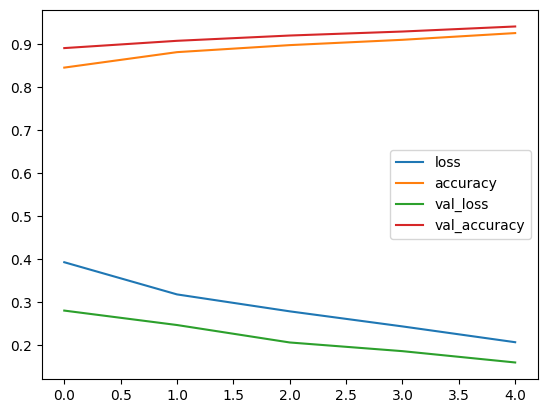

In [ ]:
#Visualizando as métricas
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

#MEDIDAS DE ACURÁCIA

In [ ]:
#Realizando predições nos dados de teste
predictions = []
true_labels = []

for batch in test:
    batch_inputs, batch_labels = batch
    batch_predictions = model.predict(batch_inputs, verbose=0)
    predictions.extend(batch_predictions)
    true_labels.extend(batch_labels)

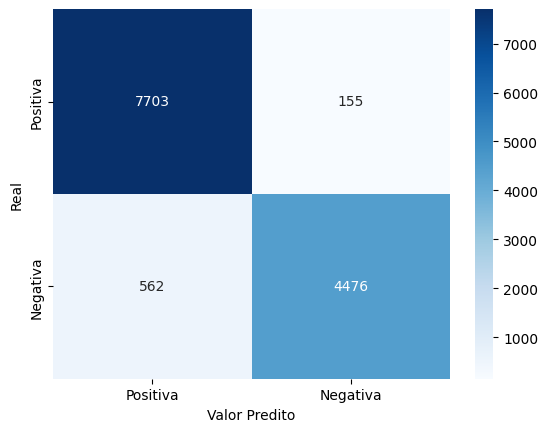

In [ ]:
#Matriz de confusão
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Positiva", "Negativa"], yticklabels=["Positiva", "Negativa"])

plt.xlabel('Valor Predito')
plt.ylabel('Real')

plt.show()

In [ ]:
#Medidas de acurácia
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)

print("Acurácia:", accuracy)
print("Precisao:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Acurácia: 0.944401364764268
Precisao: 0.9665299071474843
Recall: 0.88844779674474
F1-Score: 0.925845485572448
